# Classification Algorithms and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold

Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Task 1: Load Data from 'titanic_clean.csv'

In [2]:
# write code here
data = pd.read_csv('titanic_clean.csv')
df =  data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


In [3]:
df.shape

(891, 11)

### One Hot encoding for categorical varaibles

In [4]:
df_OneHot = pd.get_dummies(
    df, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
df = df_OneHot.copy()

### Task 2: Create Independent and Dependent Variables

In [11]:
# write code here
X = df.drop(['PassengerId', 'Survived'], axis=1)
Y = df[['Survived']]

### Task 3: Train Test n Split the data

In [12]:
# Import the library
from sklearn.model_selection import train_test_split

In [13]:
# Write the code here
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623, 1)
(268, 30) (268, 1)


In [14]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
707,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
246,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
624,1,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
96,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
576,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [15]:
ytrain.head()

,Survived
707,0
246,0
624,1
96,1
576,0


# Logistic Regression

### Creating Model & Training

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_model = LogisticRegression(random_state=25)

In [15]:
lr_model.fit(xtrain, ytrain)

LogisticRegression(random_state=25)

### Evaluation 

In [16]:
pred = lr_model.predict(xtest)

In [17]:
pred[0:9]

array([0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

Predicting prabability of **0** and **1**

In [18]:
pred_prb = lr_model.predict_proba(xtest)

In [19]:
pred_prb[0:9, 0:9]

array([[0.94902958, 0.05097042],
       [0.37627093, 0.62372907],
       [0.09230534, 0.90769466],
       [0.28346515, 0.71653485],
       [0.91152041, 0.08847959],
       [0.04733798, 0.95266202],
       [0.9566232 , 0.0433768 ],
       [0.90275411, 0.09724589],
       [0.59170453, 0.40829547]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [20]:
lr_pred_prb = lr_model.predict_proba(xtest)[:, 1]

### Comparison of Predicted and Actual

In [21]:
xtest.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
369,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
761,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
623,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
500,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
139,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [22]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
369,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.050970,1
761,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0.623729,1
623,0,0,1,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0.907695,1
500,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0.716535,1
139,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.088480,0


### Confusion Matrix Play ground

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(ytest, pred)

array([[145,  15],
       [ 23,  85]], dtype=int64)

In [25]:
confusion_matrix(ytest, pred).ravel()

array([145,  15,  23,  85], dtype=int64)

In [26]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"pred_Survived": [tp, fp], "pred_Not Survived": [
                           fn, tn]}, index=["Survived", "Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,85,23
Not Survived,15,145


### Accuracy

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8582089552238806


In [29]:
accuracy_lr = accuracy_score(ytest, pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8582089552238806


In [30]:
accuracy_lr_train = accuracy_score(ytrain,lr_model_predict(xtrain))
print("Accuracy by built-in function: {}".format(accuracy_lr_train))

NameError: name 'lr_model_predict' is not defined

### Precision

In [31]:
from sklearn.metrics import precision_score

In [32]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.85
Precision for 0: 0.8630952380952381


In [33]:
precision_lr = precision_score(ytest, pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.85


### Recall

In [34]:
from sklearn.metrics import recall_score

In [35]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7870370370370371
Recall for 0: 0.90625


In [36]:
recall_lr = recall_score(ytest, pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7870370370370371


### F1 Score

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.8173076923076923
F1 Score for 0: 0.8841463414634146


In [39]:
f1_lr = f1_score(ytest, pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.8173076923076923


### Class Distribution in Training Data

In [40]:
ytrain.value_counts()

0    389
1    234
Name: Survived, dtype: int64

### Classification Report

In [41]:
from sklearn.metrics import classification_report

In [42]:
# get report of precision recall and f1 score
print(classification_report(ytest, pred))
# macro avg

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       160
           1       0.85      0.79      0.82       108

    accuracy                           0.86       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.86      0.86      0.86       268



In [43]:
import helper_confusion_matrix as helper
helper.conf_matrix(ytest, lr_pred_prb)

              pred_Survived  pred_Not Survived
Survived                 85                 23
Not Survived             15                145
Accuracy: 85.821
Precision : 85.000
Recall: 78.704
F1 Score : 81.731
TPR: 78.704  FPR: 9.375


### ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [44]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [45]:
tpr, fpr

(0.7870370370370371, 0.09375)

In [46]:
fpr = 1 - recall_0
tpr, fpr

(0.7870370370370371, 0.09375)

Defining function to plot ROC AUC Curve

In [47]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [49]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [50]:
auc_lr = roc_auc_score(ytest, lr_pred_prb)
auc_lr

0.905787037037037

Plotting AUC ROC Curve

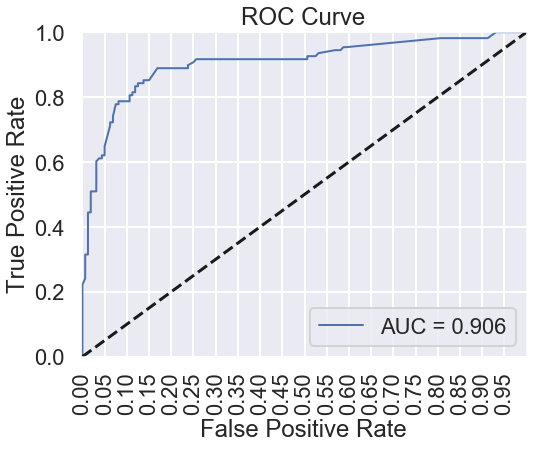

In [51]:
sns.set_context('poster')
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_lr)

## Model Complexity

In [52]:
from sklearn.preprocessing import PolynomialFeatures
acc_train = []
acc_test = []

for i in range(1, 6):
    poly_reg = PolynomialFeatures(degree=i)

    X_tr_poly, X_tst_poly = poly_reg.fit_transform(
        xtrain), poly_reg.fit_transform(xtest)

    lr_poly = LogisticRegression(random_state=25)
    lr_poly.fit(X_tr_poly, ytrain)

    y_tr_predicted, y_tst_predict = lr_poly.predict(
        X_tr_poly), lr_poly.predict(X_tst_poly)

    acc_train.append(accuracy_score(ytrain, y_tr_predicted))
    acc_test.append(accuracy_score(ytest, y_tst_predict))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

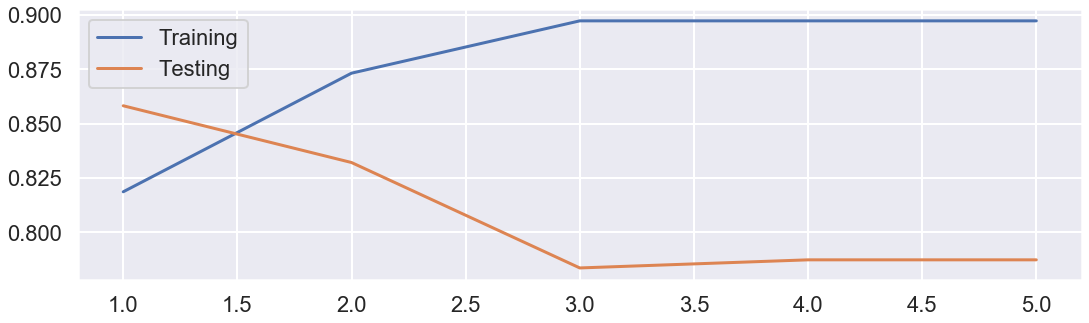

In [53]:
plt.figure(figsize=(18, 5))
sns.set_context('poster')

sns.lineplot(x=list(range(1, 6)), y=acc_train, label='Training')

sns.lineplot(x=list(range(1, 6)), y=acc_test, label='Testing')

# 3. Submission on Kaggle

### Task 4: Import test data

In [54]:
# write code here
test = None
df_test = None

### Task 5: Do One Hot encoding of test data

In [55]:
# write code here


### Task 6: Separate Passenger ID for submission

In [56]:
# Write code here


### Task 7: Do prediction through final model

In [ ]:
# write code here
pred_final = None

#### Creating Data Frame for submission

In [ ]:
submission = pd.DataFrame({'PassengerId': PassengerID, 'Survived': pred_final})

In [ ]:
submission.head()

### Task 8: Export the dataset into csv file

In [ ]:
# Write code here
